In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('icon.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('search_region.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
 
for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)
 
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
 
    cv.rectangle(img,top_left, bottom_right, 255, 2)
 
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
 
    plt.show()

In [31]:
import cv2 as cv
import pyautogui as pg 
def locate(icon: str = None): 
    # used to replace the bad pyautogui 
    # return (left, top, width, height) in pyautogui style, where 0,0 is top left.
    print("hello")

    img_rgb = cv.imread(icon)
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    full = pg.screenshot()
    filename = "full.png"
    full.save(filename)
    template = cv.imread(filename, cv.IMREAD_GRAYSCALE)
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where( res >= threshold)

hello


In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv.imread('full_screen.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('icon.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]

res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.9
loc = np.where( res >= threshold)
print(loc)

for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    break
 
cv.imwrite('res.png',img_rgb)

(array([792]), array([546]))


True

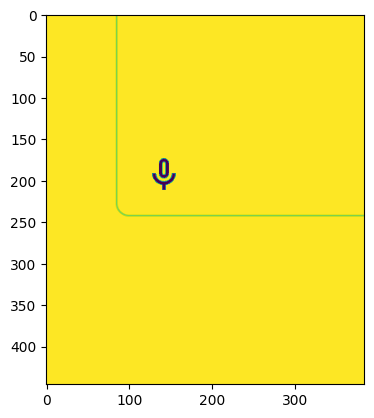

In [23]:
plt.imshow(img_gray)

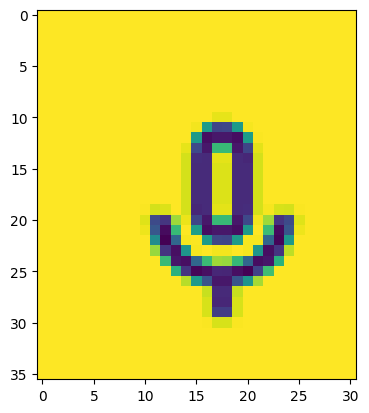

In [24]:
plt.imshow(template)